# Extraction, nettoyage, traitement, analyse et visualisation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math, os

## Extraction des données

In [2]:
df = pd.read_csv('data/FAO.csv', encoding='latin-1')
print(df.head())
print()
print(df.describe())
print()
print(df.info())

  Area Abbreviation  Area Code         Area  Item Code  \
0               AFG          2  Afghanistan       2511   
1               AFG          2  Afghanistan       2805   
2               AFG          2  Afghanistan       2513   
3               AFG          2  Afghanistan       2513   
4               AFG          2  Afghanistan       2514   

                       Item  Element Code Element         Unit  latitude  \
0        Wheat and products          5142    Food  1000 tonnes     33.94   
1  Rice (Milled Equivalent)          5142    Food  1000 tonnes     33.94   
2       Barley and products          5521    Feed  1000 tonnes     33.94   
3       Barley and products          5142    Food  1000 tonnes     33.94   
4        Maize and products          5521    Feed  1000 tonnes     33.94   

   longitude  ...   Y2004   Y2005   Y2006   Y2007   Y2008   Y2009   Y2010  \
0      67.71  ...  3249.0  3486.0  3704.0  4164.0  4252.0  4538.0  4605.0   
1      67.71  ...   419.0   445.0   546.

## Nettoyage

In [3]:
# Supprimer les lignes dupliquées
df = df.drop_duplicates()

# Vérifier les valeurs manquantes
print('\nValeurs manquantes par colonne :')
print(df.isnull().sum())

# Supprimer les lignes qui contiennent des valeurs manquantes
df = df.dropna()
# Vérifier si des lignes ont été supprimées
print('\nAprès nettoyage :')
print(df.info())


Valeurs manquantes par colonne :
Area Abbreviation      0
Area Code              0
Area                   0
Item Code              0
Item                   0
                    ... 
Y2009                104
Y2010                104
Y2011                104
Y2012                  0
Y2013                  0
Length: 63, dtype: int64

Après nettoyage :
<class 'pandas.core.frame.DataFrame'>
Index: 17938 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  17938 non-null  object 
 1   Area Code          17938 non-null  int64  
 2   Area               17938 non-null  object 
 3   Item Code          17938 non-null  int64  
 4   Item               17938 non-null  object 
 5   Element Code       17938 non-null  int64  
 6   Element            17938 non-null  object 
 7   Unit               17938 non-null  object 
 8   latitude           17938 non-null  float64
 9   longitude 

### Traitement des colonnes (convertir 'Unit' en entier, renommer les colonnes d'année, grouper / exporter en .csv)

In [4]:
# UNIT : convertir en entier
# Étape 1 : afficher les valeurs uniques de la colonne Unit
print(df["Unit"].unique())
# Étape 2 : supprimer le mot "tonnes" (et les espaces autour)
df["Unit"] = df["Unit"].str.replace("tonnes", "", case=False).str.strip()
# Étape 3 : convertir la colonne en entier (type nullable Int64)
df["Unit"] = pd.to_numeric(df["Unit"], errors="coerce").astype("Int64")
# Étape 4 (optionnel) : vérifier le résultat
print(df["Unit"].head())
print(df["Unit"].dtypes)

['1000 tonnes']
0    1000
1    1000
2    1000
3    1000
4    1000
Name: Unit, dtype: Int64
Int64


In [5]:
# ANNÉES : renommer les colonnes d'année en chaînes numériques
# Étape 1 : identifier les colonnes qui commencent par 'Y'
year_columns = [col for col in df.columns if col.startswith('Y')]

# Étape 2 : construire un mapping pour renommer 'Y1961' -> '1961', etc.
year_dict = {col: pd.to_datetime(col[1:]).strftime('%Y') for col in year_columns}

# Étape 3 : renommer les colonnes
df = df.rename(columns=year_dict)

# Étape 4 : afficher le résultat pour vérification
print("Nouvelles colonnes d'année :")
print([col for col in df.columns if col.isdigit()])

Nouvelles colonnes d'année :
['1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


In [6]:
# Sauvegarder le tableau nettoyé dans data/clean
os.makedirs('data/clean', exist_ok=True)

# Copier le DataFrame actuel (après nettoyage/transformations)
df_clean = df.copy()

# Chemin de sortie
path_wide = 'data/clean/fao_clean.csv'

# Enregistrer les fichiers
try:
    df_clean.to_csv(path_wide, index=False)
    print(f"Sauvegardé : {path_wide} (shape={df_clean.shape})")
    print("taille initiale=", df.shape)
except Exception as e:
    print('Erreur lors de la sauvegarde :', e)

Sauvegardé : data/clean/fao_clean.csv (shape=(17938, 63))
taille initiale= (17938, 63)


Forme du jeu (wide) : (17938, 63)
Forme du jeu (long) : (950714, 12)

Statistiques descriptives de la colonne Value :
count    950714.000000
mean        379.120860
std        3951.179033
min        -246.000000
25%           0.000000
50%           3.000000
75%          49.000000
max      489299.000000
Name: Value, dtype: float64

Comptes uniques (Area / Item / Element / Unit) :
Area       146
Item       115
Element      2
Unit         1
dtype: int64

Top 10 des pays par production totale :
Area
China, mainland             76248859.0
United States of America    41719176.0
India                       36549150.0
Brazil                      13818239.0
Germany                     12300442.0
Japan                        9840441.0
France                       8789026.0
Italy                        7734322.0
Nigeria                      7354579.0
Indonesia                    7298902.0
Name: Value, dtype: float64


C:\Users\axela\AppData\Local\Temp\ipykernel_19896\2779322295.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_areas.values, y=top_areas.index, palette='viridis')


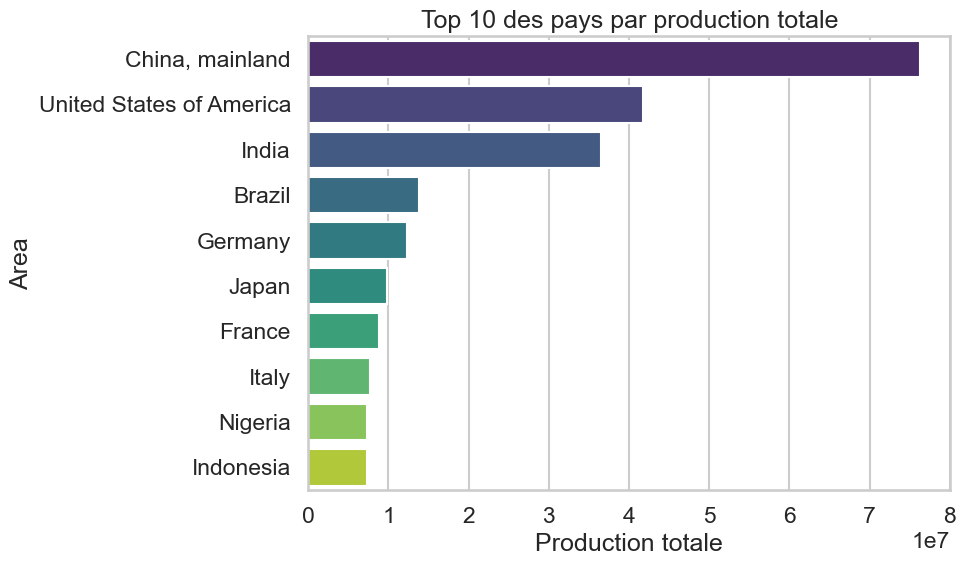

C:\Users\axela\AppData\Local\Temp\ipykernel_19896\2779322295.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.index, y=top_items.values, palette='magma')


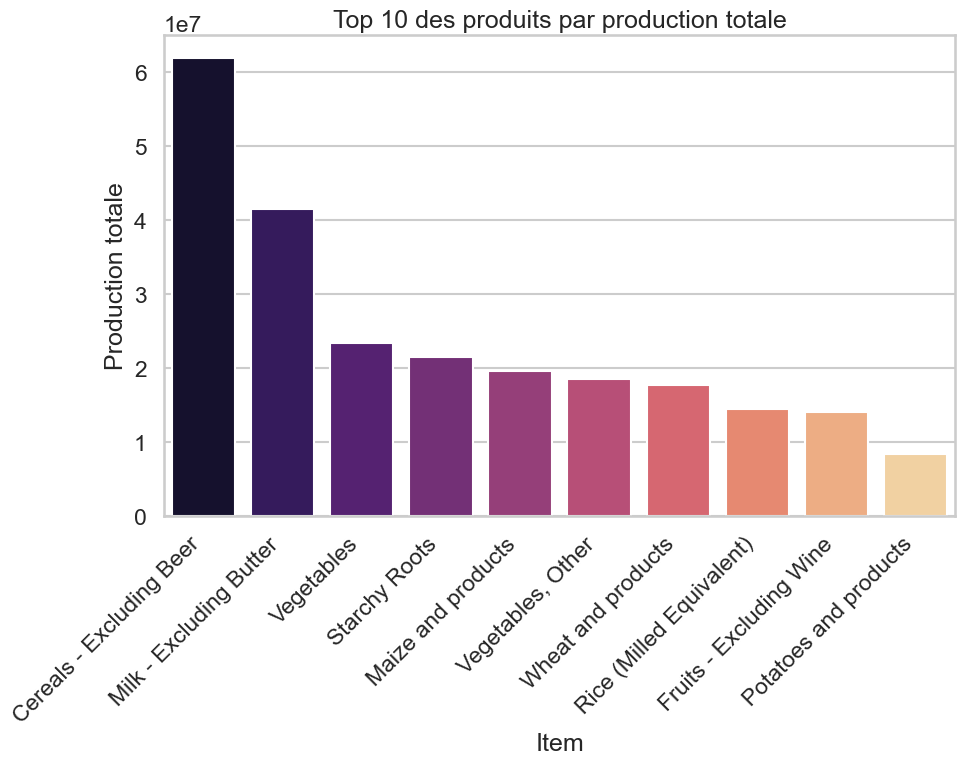

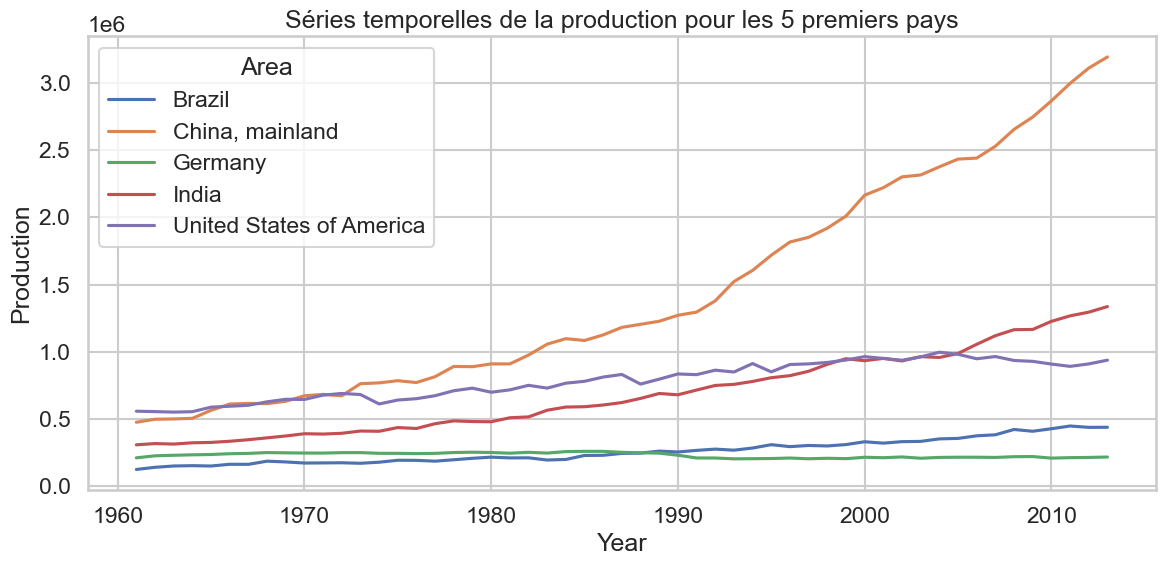


Exemple de valeurs manquantes par année :
Year
1961    0
1962    0
1963    0
1964    0
1965    0
1966    0
1967    0
1968    0
1969    0
1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
Name: Value, dtype: int64


In [17]:
# EDA exploratoire : statistiques descriptives et graphiques
sns.set(style='whitegrid', context='talk')

# Identifier les colonnes d'année (après renommage)
year_cols = [c for c in df.columns if c.isdigit()]
# convertir en numérique si nécessaire
if year_cols:
    df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce')

# Transformer en format long pour l'analyse temporelle
id_vars = [c for c in df.columns if c not in year_cols]
df_long = df.melt(id_vars=id_vars, value_vars=year_cols, var_name='Year', value_name='Value')
df_long['Year'] = pd.to_datetime(df_long['Year'], format='%Y', errors='coerce')

# Vue d'ensemble et statistiques
print("Forme du jeu (wide) :", df.shape)
print("Forme du jeu (long) :", df_long.shape)
print("\nStatistiques descriptives de la colonne Value :")
print(df_long['Value'].describe())

print("\nComptes uniques (Area / Item / Element / Unit) :")
print(df[['Area','Item','Element','Unit']].nunique())

# Top 10 des pays par production totale
top_areas = df_long.groupby("Area")["Value"] .sum().sort_values(ascending=False).head(10)
print("\nTop 10 des pays par production totale :")
print(top_areas)

# Graphique 1 : barplot Top 10 des pays
plt.figure(figsize=(10,6))
sns.barplot(x=top_areas.values, y=top_areas.index, palette='viridis')
plt.title('Top 10 des pays par production totale')
plt.xlabel('Production totale')
plt.tight_layout()
plt.show()

# Graphique 2 : Top 10 des produits par production totale
top_items = df_long.groupby('Item')['Value'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,8))
sns.barplot(x=top_items.index, y=top_items.values, palette='magma')
plt.title('Top 10 des produits par production totale')
plt.ylabel('Production totale')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes pour meilleure lisibilité
plt.tight_layout()
plt.show()

# Graphique 3 : séries temporelles pour les 5 premiers pays
top5 = list(top_areas.index[:5])
ts = df_long[df_long['Area'].isin(top5)].groupby(['Year','Area'])['Value'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=ts, x='Year', y='Value', hue='Area')
plt.title('Séries temporelles de la production pour les 5 premiers pays')
plt.ylabel('Production')
plt.tight_layout()
plt.show()

# Manquements par année (utile pour décider imputation ou suppression)
missing_per_year = df_long.groupby(df_long['Year'].dt.year)['Value'].apply(lambda x: x.isna().sum())
print("\nExemple de valeurs manquantes par année :")
print(missing_per_year.head(15))

Top 6 des pays par production totale :
Area
China, mainland             76248859.0
United States of America    41719176.0
India                       36549150.0
Brazil                      13818239.0
Germany                     12300442.0
Japan                        9840441.0
Name: Value, dtype: float64


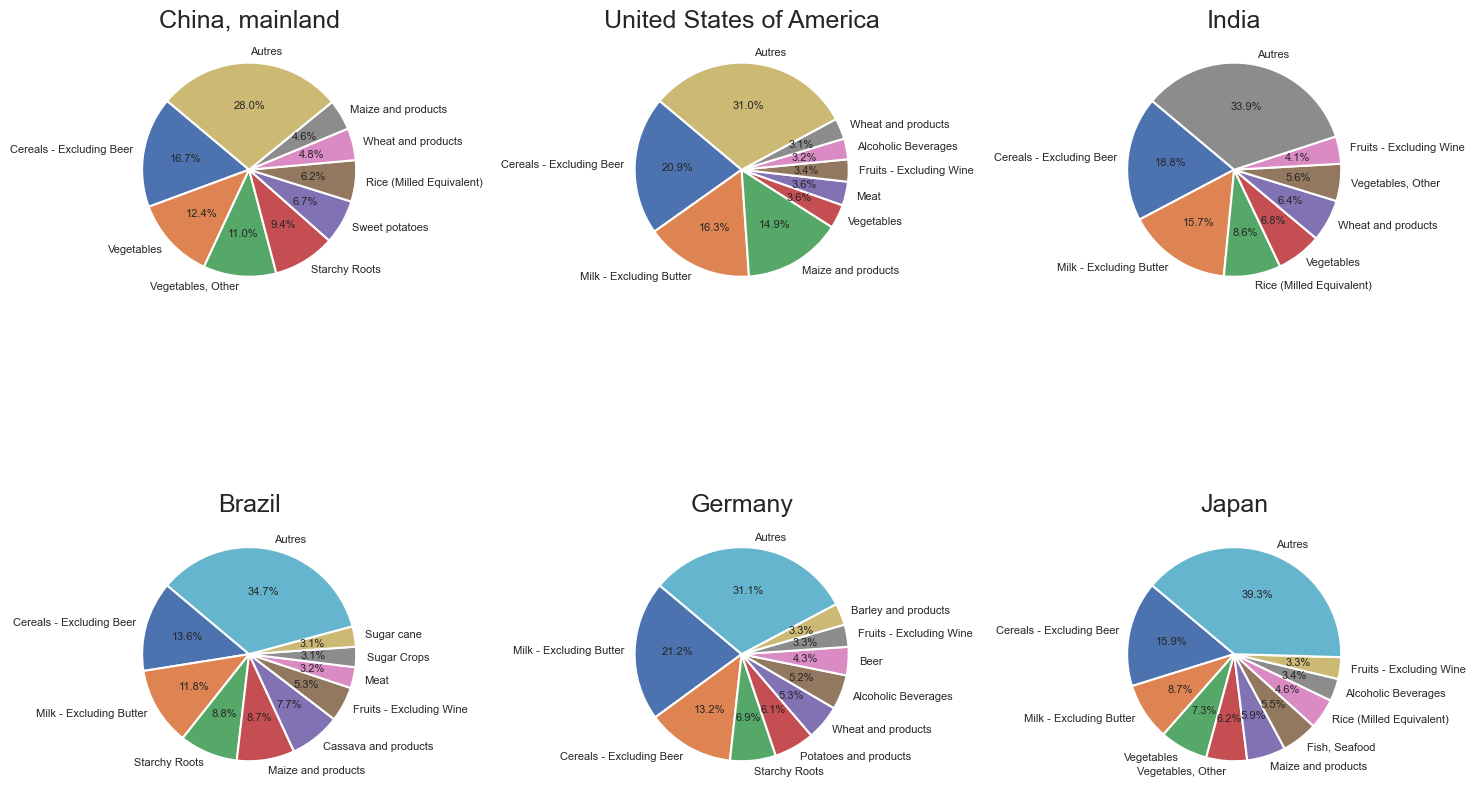

In [8]:
# Diagrammes en secteurs par pays : répartition de la production par produit (agrégée sur toutes les années)

# Agréger par Area + Item (somme sur les années)
agg = df_long.groupby(['Area','Item'])['Value'].sum().reset_index()
# Totaux par pays pour sélectionner les pays à tracer
total_by_area = agg.groupby('Area')['Value'].sum().sort_values(ascending=False)
print('Top 6 des pays par production totale :')
print(total_by_area.head(6))

# Sélection par défaut : top 6 pays. Modifier top_n si vous voulez plus/moins.
top_n = 6
selected_areas = list(total_by_area.head(top_n).index)

# Fonction utilitaire : tracer un camembert pour un pays
def plot_pie_for_area(area, ax=None, small_pct_threshold=0.03):
    data = agg[agg['Area'] == area].copy()
    data = data.sort_values('Value', ascending=False)
    data = data[data['Value'] > 0]
    if data.empty:
        if ax is None:
            fig, ax = plt.subplots()
        ax.text(0.5, 0.5, 'Pas de données', ha='center')
        ax.set_title(area)
        return
    total = data['Value'].sum()
    # Regrouper les petites parts dans 'Autres' (seuil relatif)
    thresh = total * small_pct_threshold
    big = data[data['Value'] >= thresh]
    small = data[data['Value'] < thresh]
    labels = list(big['Item'])
    sizes = list(big['Value'])
    if not small.empty:
        labels.append('Autres')
        sizes.append(small['Value'].sum())
    # Tracer
    if ax is None:
        fig, ax = plt.subplots(figsize=(6,6))
    ax.pie(sizes, labels=labels, autopct=lambda p: ('%1.1f%%' % p) if p>0 else '', startangle=140, textprops={'fontsize':8})
    ax.set_title(area)

# Tracer plusieurs camemberts dans une grille
n = len(selected_areas)
cols = 3
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*5))
axes = axes.flatten()
for i, area in enumerate(selected_areas):
    plot_pie_for_area(area, ax=axes[i])
# Désactiver les axes restants
for j in range(i+1, rows*cols):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

### Graphiques sur les "moins", niveau pays et items produits

Forme du jeu (wide) : (17938, 63)
Forme du jeu (long) : (950714, 12)

Statistiques descriptives (colonne Value) :
count    950714.000000
mean        379.120860
std        3951.179033
min        -246.000000
25%           0.000000
50%           3.000000
75%          49.000000
max      489299.000000
Name: Value, dtype: float64

Comptes uniques (Area / Item / Element / Unit) :
Area       146
Item       115
Element      2
Unit         1
dtype: int64

Bottom 10 des pays par production totale :
Area
Saint Kitts and Nevis                2102.0
Kiribati                             4406.0
Antigua and Barbuda                  4446.0
Bermuda                              4933.0
Grenada                              6379.0
Saint Vincent and the Grenadines     6715.0
Dominica                             7372.0
Sao Tome and Principe                7382.0
Saint Lucia                         10141.0
Vanuatu                             11362.0
Name: Value, dtype: float64


C:\Users\axela\AppData\Local\Temp\ipykernel_19896\3957047128.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_areas.values, y=top_areas.index, palette='viridis')


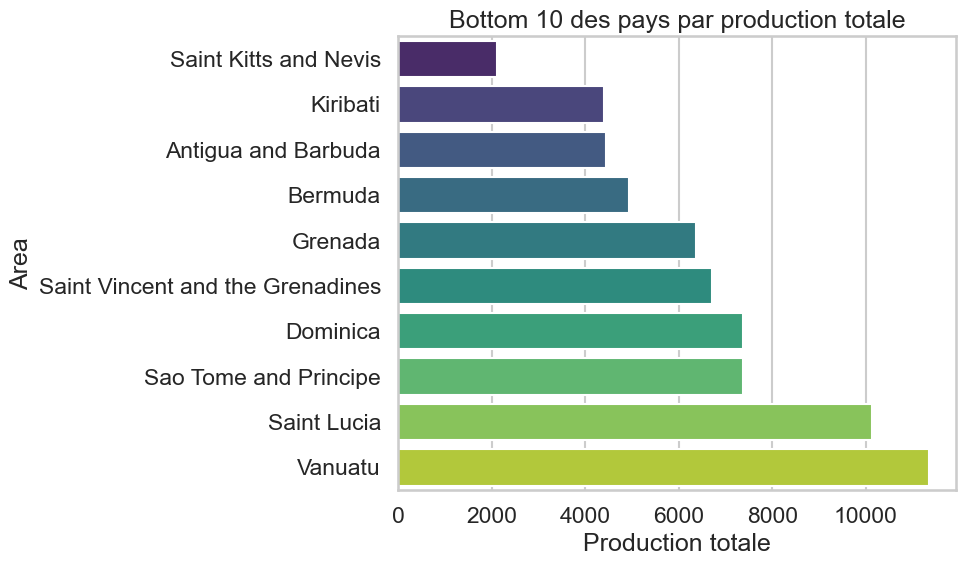

C:\Users\axela\AppData\Local\Temp\ipykernel_19896\3957047128.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette='magma')


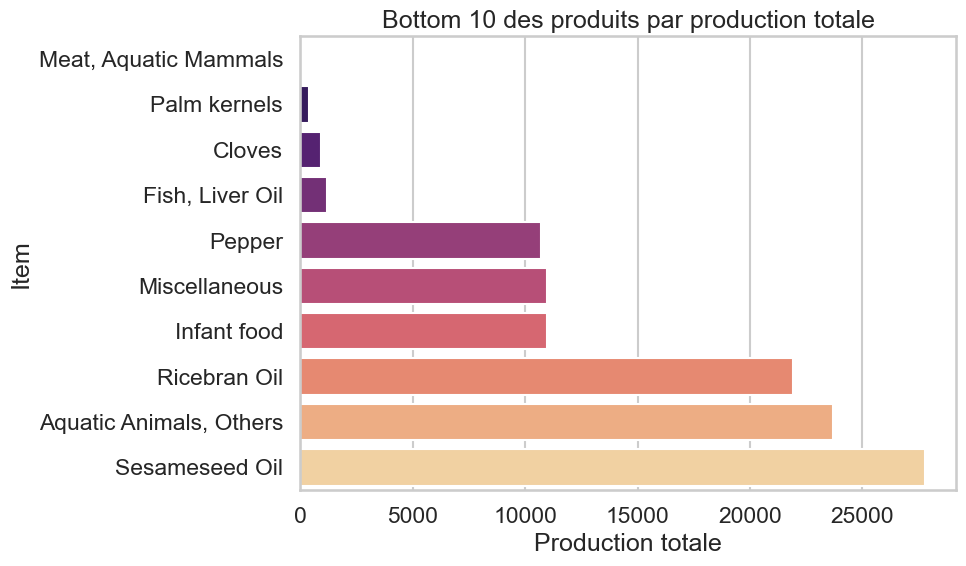

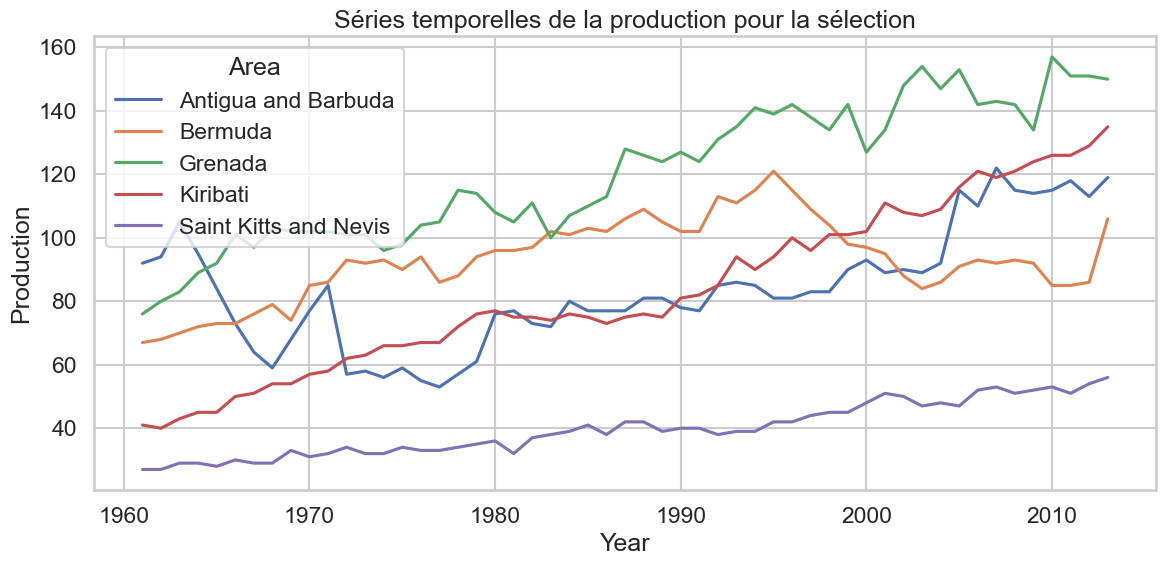


Exemple de valeurs manquantes par année :
Year
1961    0
1962    0
1963    0
1964    0
1965    0
1966    0
1967    0
1968    0
1969    0
1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
Name: Value, dtype: int64


In [9]:
# EDA exploratoire : statistiques descriptives et graphiques (section alternative)
sns.set(style='whitegrid', context='talk')

# Identifier les colonnes d'année (après renommage)
year_cols = [c for c in df.columns if c.isdigit()]
# convertir en numérique si nécessaire
if year_cols:
    df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce')

# Transformer en format long pour l'analyse temporelle
id_vars = [c for c in df.columns if c not in year_cols]
df_long = df.melt(id_vars=id_vars, value_vars=year_cols, var_name='Year', value_name='Value')
df_long['Year'] = pd.to_datetime(df_long['Year'], format='%Y', errors='coerce')

# Vue d'ensemble et statistiques
print("Forme du jeu (wide) :", df.shape)
print("Forme du jeu (long) :", df_long.shape)
print("\nStatistiques descriptives (colonne Value) :")
print(df_long['Value'].describe())

print("\nComptes uniques (Area / Item / Element / Unit) :")
print(df[['Area','Item','Element','Unit']].nunique())

# Bottom 10 des pays par production totale
top_areas = df_long.groupby('Area')['Value'].sum().sort_values(ascending=True).head(10)
print("\nBottom 10 des pays par production totale :")
print(top_areas)

# Graphique 1 : barplot Bottom 10 des pays
plt.figure(figsize=(10,6))
sns.barplot(x=top_areas.values, y=top_areas.index, palette='viridis')
plt.title('Bottom 10 des pays par production totale')
plt.xlabel('Production totale')
plt.tight_layout()
plt.show()

# Graphique 2 : Bottom 10 des produits par production totale
top_items = df_long.groupby('Item')['Value'].sum().sort_values(ascending=True).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_items.values, y=top_items.index, palette='magma')
plt.title('Bottom 10 des produits par production totale')
plt.xlabel('Production totale')
plt.tight_layout()
plt.show()

# Graphique 3 : séries temporelles pour les 5 premiers de cette sélection
top5 = list(top_areas.index[:5])
ts = df_long[df_long['Area'].isin(top5)].groupby(['Year','Area'])['Value'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=ts, x='Year', y='Value', hue='Area')
plt.title('Séries temporelles de la production pour la sélection')
plt.ylabel('Production')
plt.tight_layout()
plt.show()

# Manquements par année (utile pour décider imputation ou suppression)
missing_per_year = df_long.groupby(df_long['Year'].dt.year)['Value'].apply(lambda x: x.isna().sum())
print("\nExemple de valeurs manquantes par année :")
print(missing_per_year.head(15))

Bottom 6 des pays par production totale :
Area
Saint Kitts and Nevis               2102.0
Kiribati                            4406.0
Antigua and Barbuda                 4446.0
Bermuda                             4933.0
Grenada                             6379.0
Saint Vincent and the Grenadines    6715.0
Name: Value, dtype: float64


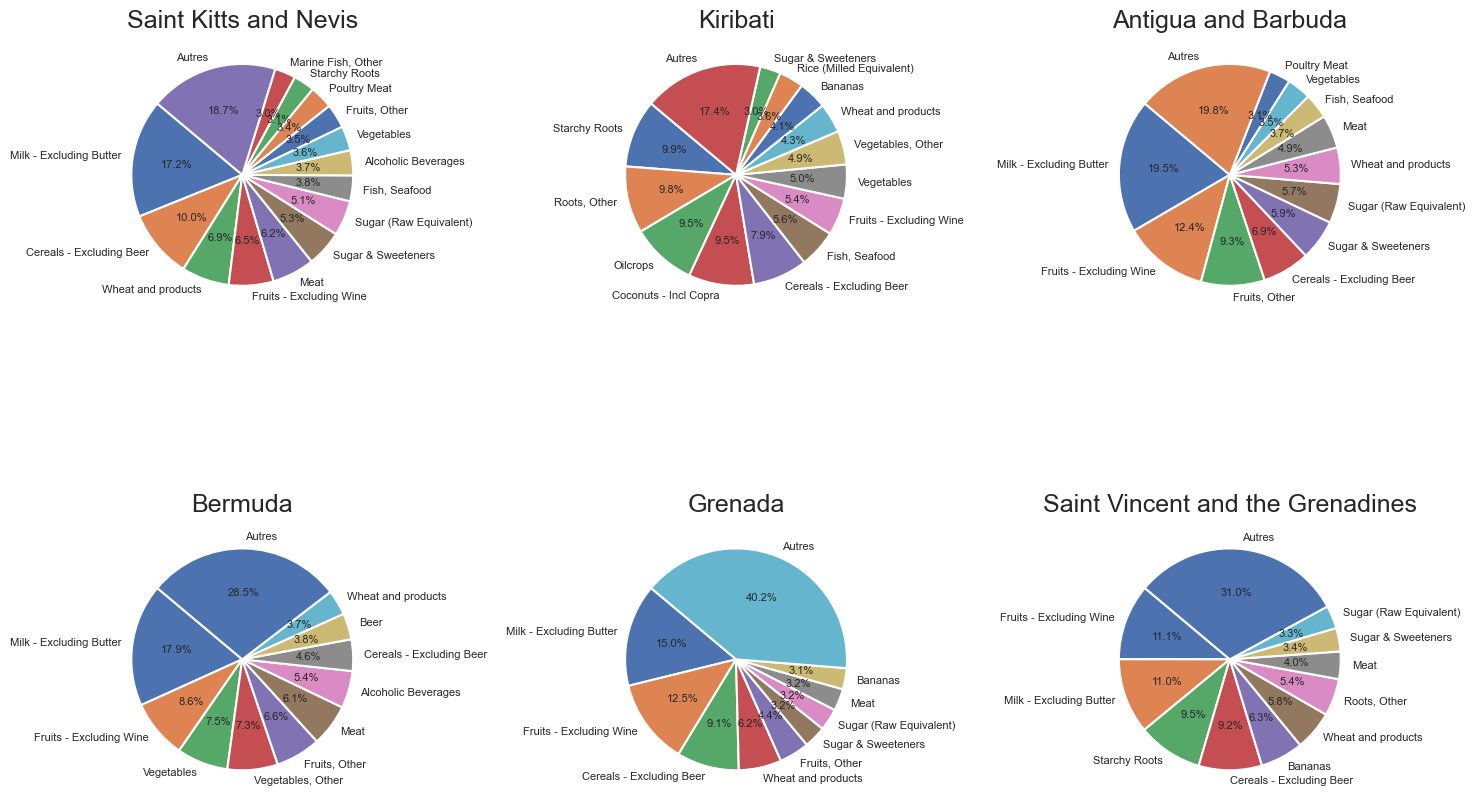

In [10]:
# Diagrammes en secteurs par pays : répartition de la production par produit (agrégée sur toutes les années)

# Agréger par Area + Item (somme sur les années)
agg = df_long.groupby(['Area','Item'])['Value'].sum().reset_index()
# Totaux par pays pour sélectionner les pays à tracer
total_by_area = agg.groupby('Area')['Value'].sum().sort_values(ascending=True)
print('Bottom 6 des pays par production totale :')
print(total_by_area.head(6))

# Sélection par défaut : bottom 6 pays. Modifier top_n si vous voulez plus/moins.
top_n = 6
selected_areas = list(total_by_area.head(top_n).index)

# Fonction utilitaire : tracer un camembert pour un pays
def plot_pie_for_area(area, ax=None, small_pct_threshold=0.03):
    data = agg[agg['Area'] == area].copy()
    data = data.sort_values('Value', ascending=False)
    data = data[data['Value'] > 0]
    if data.empty:
        if ax is None:
            fig, ax = plt.subplots()
        ax.text(0.5, 0.5, 'Pas de données', ha='center')
        ax.set_title(area)
        return
    total = data['Value'].sum()
    # Regrouper les petites parts dans 'Autres' (seuil relatif)
    thresh = total * small_pct_threshold
    big = data[data['Value'] >= thresh]
    small = data[data['Value'] < thresh]
    labels = list(big['Item'])
    sizes = list(big['Value'])
    if not small.empty:
        labels.append('Autres')
        sizes.append(small['Value'].sum())
    # Tracer
    if ax is None:
        fig, ax = plt.subplots(figsize=(6,6))
    ax.pie(sizes, labels=labels, autopct=lambda p: ('%1.1f%%' % p) if p>0 else '', startangle=140, textprops={'fontsize':8})
    ax.set_title(area)

# Tracer plusieurs camemberts dans une grille
n = len(selected_areas)
cols = 3
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*5))
axes = axes.flatten()
for i, area in enumerate(selected_areas):
    plot_pie_for_area(area, ax=axes[i])
# Désactiver les axes restants
for j in range(i+1, rows*cols):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

## Analyses et narration

Statistiques descriptives, visualisations par colonne, vérifications simples des relations (corrélation), et une brève narration non technique expliquant les choix et les principales conclusions.

In [11]:
# --- Statistiques descriptives et résumé des valeurs manquantes (lisible pour un public non technique)
# Afficher un tableau compact de statistiques descriptives pour les colonnes numériques et les comptes pour les colonnes catégorielles.
print('Statistiques descriptives (colonnes numériques) :')
display(df.describe().T)

print('Comptes et principales catégories (Area / Item / Element / Unit) :')
for col in ['Area','Item','Element','Unit']:
    if col in df.columns:
        print(f'Colonne : {col} — principales valeurs :')
        print(df[col].value_counts().head(8))

# Résumé des valeurs manquantes (comptes et pourcentage)
miss = df.isnull().sum()
miss_pct = (miss / len(df) * 100).round(2)
missing_table = pd.DataFrame({'missing_count': miss, 'missing_pct': miss_pct})
print('Résumé des valeurs manquantes :')
display(missing_table)

# S'assurer que df_long existe : sinon le créer (défensif)
if 'df_long' not in globals():
    year_cols = [c for c in df.columns if c.isdigit()]
    if year_cols:
        id_vars = [c for c in df.columns if c not in year_cols]
        df_long = df.melt(id_vars=id_vars, value_vars=year_cols, var_name='Year', value_name='Value')
        df_long['Year'] = pd.to_datetime(df_long['Year'], format='%Y', errors='coerce')
    else:
        df_long = pd.DataFrame()

print('Aperçu du format long (5 premières lignes) :')
display(df_long.head())

Statistiques descriptives (colonnes numériques) :


,count,mean,std,min,25%,50%,75%,max
Area Code,17938.0,118.224886,69.701949,2.0,56.0,115.0,174.0,251.0
Item Code,17938.0,2694.188817,148.640459,2511.0,2561.0,2641.0,2782.0,2961.0
Element Code,17938.0,5207.624596,143.409486,5142.0,5142.0,5142.0,5142.0,5521.0
Unit,17938.0,1000.0,0.0,1000.0,1000.0,1000.0,1000.0,1000.0
latitude,17938.0,15.773818,23.824765,-40.9,1.37,15.45,33.85,64.96
longitude,17938.0,11.797621,70.773231,-172.1,-56.03,12.57,45.08,179.41
1961,17938.0,195.262069,1864.124336,0.0,0.0,1.0,21.0,112227.0
1962,17938.0,200.78225,1884.265591,0.0,0.0,1.0,22.0,109130.0
1963,17938.0,205.4646,1861.174739,0.0,0.0,1.0,23.0,106356.0
1964,17938.0,209.925577,1862.000116,0.0,0.0,1.0,24.0,104234.0


Comptes et principales catégories (Area / Item / Element / Unit) :
Colonne : Area — principales valeurs :
Area
Spain              150
Italy              148
Germany            147
China, mainland    146
Japan              143
Greece             143
United Kingdom     143
Hungary            142
Name: count, dtype: int64
Colonne : Item — principales valeurs :
Item
Milk - Excluding Butter     450
Eggs                        298
Cereals - Excluding Beer    291
Fish, Seafood               283
Maize and products          278
Pelagic Fish                275
Oilcrops                    259
Cereals, Other              255
Name: count, dtype: int64
Colonne : Element — principales valeurs :
Element
Food    14832
Feed     3106
Name: count, dtype: int64
Colonne : Unit — principales valeurs :
Unit
1000    17938
Name: count, dtype: Int64
Résumé des valeurs manquantes :


,missing_count,missing_pct
Area Abbreviation,0,0.0
Area Code,0,0.0
Area,0,0.0
Item Code,0,0.0
Item,0,0.0
...,...,...
2009,0,0.0
2010,0,0.0
2011,0,0.0
2012,0,0.0


Aperçu du format long (5 premières lignes) :


,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Year,Value
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000,33.94,67.71,1961-01-01,1928.0
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000,33.94,67.71,1961-01-01,183.0
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000,33.94,67.71,1961-01-01,76.0
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000,33.94,67.71,1961-01-01,237.0
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000,33.94,67.71,1961-01-01,210.0


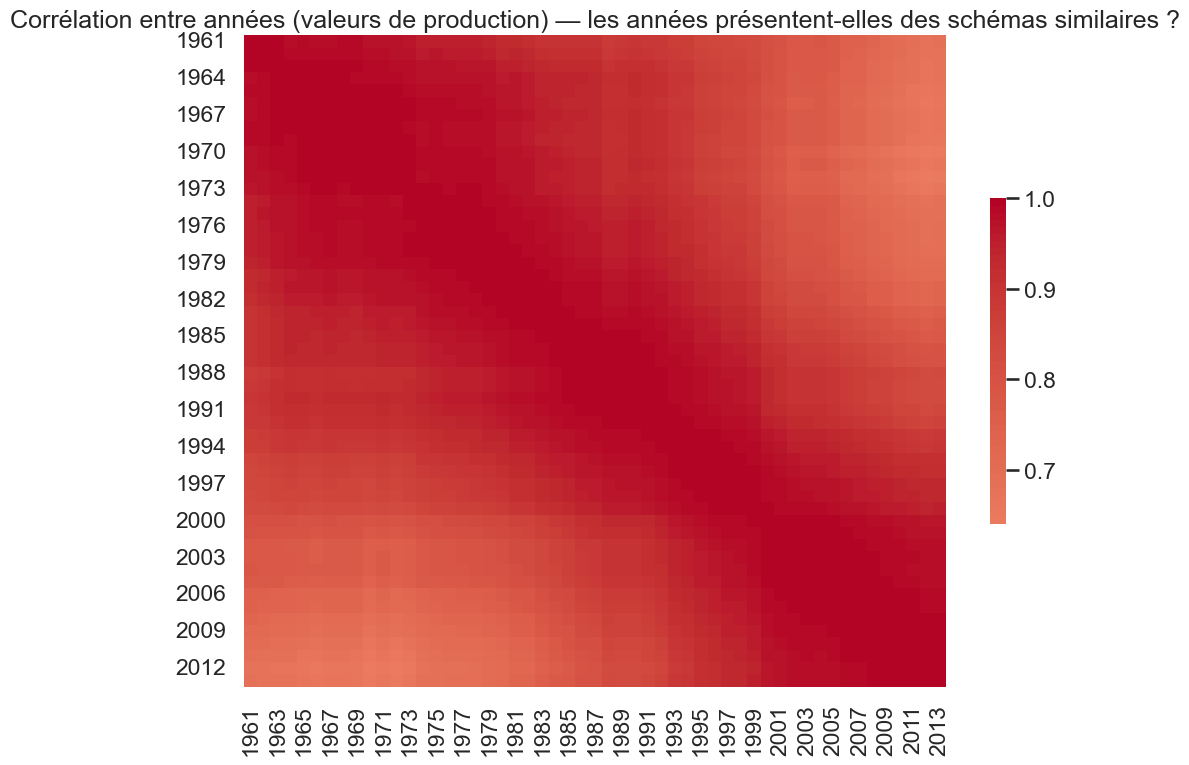

In [12]:
# --- Vérifications des relations : carte de corrélation entre années (si format wide disponible)
# Préférer le calcul des corrélations entre colonnes d'année dans le dataframe wide 'df' si présent
year_cols = [c for c in df.columns if c.isdigit()]
if year_cols:
    # calculer la corrélation entre les années sur l'ensemble des Area+Item (remplacer les petits NaN par 0 pour la corrélation)
    year_df = df[year_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
    corr = year_df.corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, cmap='coolwarm', center=0, cbar_kws={'shrink':0.5})
    plt.title('Corrélation entre années (valeurs de production) — les années présentent-elles des schémas similaires ?')
    plt.tight_layout()
    plt.show()
else:
    print('Aucune colonne ressemblant à une année détectée dans le format wide pour calculer la carte de corrélation inter-années.')

## Méthodologie et explications accessibles

Pourquoi ces analyses ?
- Les statistiques descriptives fournissent un résumé numérique rapide (moyenne, médiane, dispersion) permettant à un lecteur non technique de comprendre l'échelle typique de la production.
- Les histogrammes et diagrammes en barres rendent les distributions et les principaux contributeurs visuellement évidents — ils sont choisis pour leur simplicité de lecture.
- La carte de corrélation vérifie si les schémas de production entre les années sont similaires ; de fortes corrélations suggèrent des tendances stables dans le temps.
- L'exemple de scatter / séries temporelles montre l'évolution de la production pour un seul produit ; la moyenne mobile met en évidence les tendances à court terme par rapport au bruit.

Comment lire les graphiques (conseils pour un public non technique) :
- Regardez d'abord le titre, il indique la question à laquelle répond le graphique.
- Pour les diagrammes en barres : des barres plus longues = plus de production. Pour les diagrammes en secteurs (si présents) : des parts plus grandes = une plus grande part.
- Pour les histogrammes : un pic à gauche signifie de nombreuses petites valeurs ; une longue queue à droite signifie quelques valeurs très élevées.

Remarques sur les choix de traitement :
- Nous avons converti les colonnes commençant par 'Y' (par ex. 'Y1961') en chaînes d'année ('1961') pour faciliter le traitement temporel.
- Nous avons transformé le tableau large en format long (une ligne par Area-Item-Year) car cela simplifie les groupements et le tracé des séries temporelles.
- Les valeurs manquantes ont été inspectées et rapportées ; selon l'objectif, de faibles quantités de données manquantes peuvent être conservées, imputées ou supprimées, ici nous rapportons l'ampleur pour que le lecteur puisse en juger.

## Principaux enseignements (brefs et accessibles)

- Un petit nombre de pays (Areas) et de produits (Items) représente une grande part de la production totale, cela se voit dans les diagrammes top 10.
- Les valeurs de production sont asymétriques : de nombreuses observations sont faibles tandis que quelques-unes sont très élevées.
- Les corrélations inter-années indiquent si les schémas de production sont stables dans le temps. Des corrélations élevées signifient des tendances cohérentes ; des corrélations faibles signalent des changements au fil du temps.